In [1]:
from keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
singel_image = x_train[0]

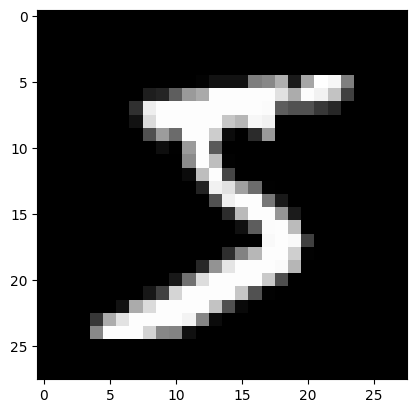

In [6]:
singel_image

ndarray = singel_image.reshape(28, 28)
plt.imshow(ndarray, cmap='gray')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
from keras.utils import to_categorical

In [10]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [11]:
y_cat_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
singel_image.max()


np.uint8(255)

In [13]:
x_train = x_train / x_train.max()

In [14]:
x_test = x_test / x_test.max()

In [15]:
scaled_image = x_train[0]

In [16]:
scaled_image.max()

np.float64(1.0)

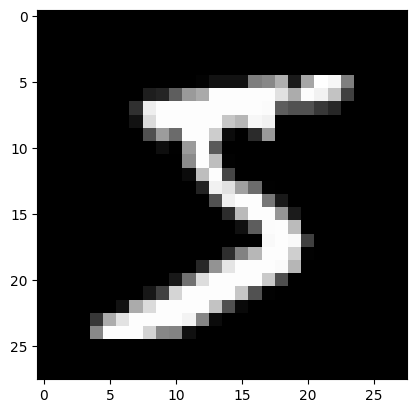

In [17]:
plt.imshow(scaled_image, cmap='gray')


In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [19]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
from warnings import filters
from itertools import filterfalse
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(12,12,1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])




c:\Users\piusw\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,006 (492.21 KB)

 Trainable params: 126,006 (492.21 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9549 - loss: 0.1427
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9862 - loss: 0.0451


In [24]:
model.metrics_names

['loss', 'compile_metrics']

In [25]:
model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.0578


[0.05779537186026573, 0.9803000092506409]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix


In [27]:
import numpy as np

# predict probabilities for each class
predictions = model.predict(x_test)

# convert probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10000, 10))

In [29]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [30]:
y_test

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [31]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.93      0.96       982
           5       0.96      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.94      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

